Text(0.5, 1.0, 'Wolf-Sheep Population Dynamics (No AI)')

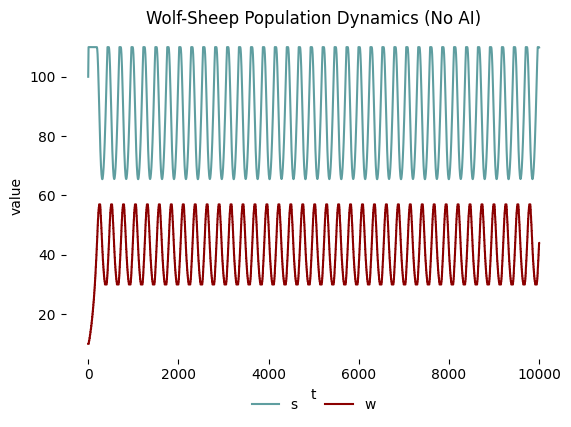

In [5]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append(os.path.abspath(".."))

# Fix the import path
from model.model import run_coroutine

# Run model with no_ai=True (note the correct keyword argument syntax)
results = await run_coroutine(
    steps=10000,
    no_ai=True,
    theta_star=0.23
    )

# Convert results to a DataFrame for plotting
xdf = pd.DataFrame(
    {
        "t": list(range(len(results["sheep_history"]))),  # Use dictionary access with ["key"]
        "s": results["sheep_history"],                    # instead of .attribute
        "w": results["wolf_history"],
    }
)

# Create the plot
sns.lineplot(
    data=pd.melt(xdf, id_vars=["t"]),
    x="t",
    y="value",
    hue="variable",
    palette=["cadetblue", "darkred"],
)
plt.legend(frameon=False, ncol=2, loc="lower center", bbox_to_anchor=(0.5, -0.2))
sns.despine(left=True, bottom=True)
plt.subplots_adjust(bottom=0.2)
plt.title("Wolf-Sheep Population Dynamics (No AI)")